## Bank Telemarketing Campaign Case Study

#### Problem Statement:

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

The target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. In addition, build a prediction model for the bank to identify in the future the customers who will likely accept or reject the offer.

#### Importing the libraries.

In [15]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [16]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Session- 2, Data Cleaning

### Segment- 2, Data Types

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame.

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type**
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set.

In [17]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0= pd.read_csv('bank_tele_marketing_data.csv')

In [18]:
#Print the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately.
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [19]:
#read the file in inp0 without first two rows as it is of no use.
inp0= pd.read_csv('bank_tele_marketing_data.csv', header=2)

In [20]:
#print the head of the data frame.
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [21]:
#print the information of variables to check their data types.
print(inp0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [22]:
#convert the age variable data type from float to integer.
inp0.age = inp0.age.astype(pd.Int64Dtype())
inp0.age.dtypes

Int64Dtype()

In [23]:
#print the average age of customers.
avg_cust_age = inp0.age.mean()
print('Average age of customers {} years'.format(round(avg_cust_age)))

Average age of customers 41 years


The average age of 41 years means that the bank customers are adults.

#### Dropping customer id column.

In [24]:
#drop the customer id as it is of no use.
inp0.drop('customerid',axis = 1, inplace = True)

Dropping the customerid column is a good process to hide PII(Personal Identifiable Information).

#### Dividing "jobedu" column into job and education categories.

In [25]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job']= inp0.jobedu.apply(lambda x: x.split(',')[0])

In [26]:
inp0['job']

0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object

In [27]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education']= inp0.jobedu.apply(lambda x: x.split(',')[1])

In [28]:
inp0['education']

0         tertiary
1        secondary
2        secondary
3          unknown
4          unknown
           ...    
45206     tertiary
45207      primary
45208    secondary
45209    secondary
45210    secondary
Name: education, Length: 45211, dtype: object

In [29]:
#drop the "jobedu" column from the dataframe.
inp0.drop('jobedu', axis =1, inplace=True)
inp0.columns

Index(['age', 'salary', 'balance', 'marital', 'targeted', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'response', 'job', 'education'],
      dtype='object')

### Segment- 4, Impute/Remove missing values

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


#### handling missing values in age column.

In [30]:
#count the missing values in age column.
print('The number of missing values in the age column is {}'.format(inp0.age.isnull().sum()))

The number of missing values in the age column is 20


In [31]:
#pring the shape of dataframe inp0
print('The dataframe shape is: {}'.format(inp0.shape))

The dataframe shape is: (45211, 19)


In [32]:
#calculate the percentage of missing values in age column.
print('The percentage of missing values in age column is: {}'.format(inp0.age.isnull().sum()/inp0.shape[0]))

The percentage of missing values in age column is: 0.00044237021963681403


Drop the records with age missing.

In [33]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp0.dropna(subset = ['age'],inplace=True)
inp1 = inp0.copy()

#### handling missing values in month column

In [34]:
#count the missing values in month column in inp1.
nan_month_count = inp0.month.isnull().sum()
print('The missing values count in the month column is: {}'.format(nan_month_count))

The missing values count in the month column is: 50


In [35]:
#print the percentage of each month in the data frame inp1.
print('The percentage of the missing values of the month column is: {}'.format(nan_month_count/inp0.shape[0]))

The percentage of the missing values of the month column is: 0.0011064149941360005


In [36]:
inp1['month'] = inp1.month.apply(lambda x: str(x).split(',')[0])

In [37]:
#find the mode of month in inp1
print("The mode of the month is {}".format(inp1.month.describe().top))
# the pandas mode() function can be also used.

The mode of the month is may


In [38]:
# fill the missing values with mode value of month in inp1.
month_mode = inp1.month.describe().top
inp1.month.fillna(month_mode, inplace=True)

In [39]:
#let's see the null values in the month column.
inp1.month.isnull().sum()

0

#### handling missing values in response column

In [40]:
#count the missing values in response column in inp1.
nan_resp_count = inp0.response.isnull().sum()
print('The missing values count in the month column is: {}'.format(nan_resp_count))

The missing values count in the month column is: 30


In [41]:
#calculate the percentage of missing values in response column.
print('The percentage of the missing values of the month column is: {}'.format(nan_resp_count/inp1.shape[0]))

The percentage of the missing values of the month column is: 0.0006638489964816003


Target variable is better of not imputed.
- Drop the records with missing values.

In [42]:
#drop the records with response missings in inp1.
inp1.dropna(subset=['response'], inplace=True)
#check if missing values after drop
inp1.response.isnull().sum()

0

In [43]:
inp1.columns

Index(['age', 'salary', 'balance', 'marital', 'targeted', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'response', 'job', 'education'],
      dtype='object')

In [44]:
#calculate the missing values in each column of data frame: inp1.
for col in inp1.columns:
    print('The missing values in {} is {}'.format(col, inp1[col].isnull().sum()))

The missing values in age is 0
The missing values in salary is 0
The missing values in balance is 0
The missing values in marital is 0
The missing values in targeted is 0
The missing values in default is 0
The missing values in housing is 0
The missing values in loan is 0
The missing values in contact is 0
The missing values in day is 0
The missing values in month is 0
The missing values in duration is 0
The missing values in campaign is 0
The missing values in pdays is 0
The missing values in previous is 0
The missing values in poutcome is 0
The missing values in response is 0
The missing values in job is 0
The missing values in education is 0


#### handling pdays column.

In [45]:
#describe the pdays column of inp1.
inp1.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [46]:
#describe the pdays column with considering the -1 values.
inp1.pdays = inp1.pdays.replace(-1, np.nan)
inp1.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Segment- 5, Handling Outliers

Major approaches to the treat outliers:

- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable

In [47]:
#describe the age variable in inp1.
inp1.age.describe()

count      45161.0
mean     40.935763
std       10.61879
min           18.0
25%           33.0
50%           39.0
75%           48.0
max           95.0
Name: age, dtype: Float64

In [48]:
inp1.age

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45161, dtype: Int64

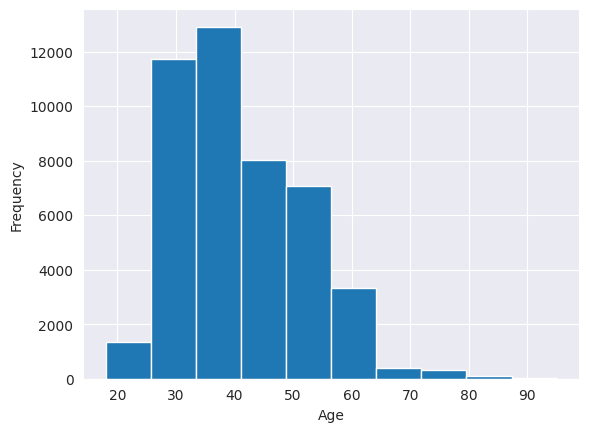

In [49]:
#plot the histogram of age variable.
sns.set_style('darkgrid')
ax = inp1.age.plot(kind='hist')
ax.set_xlabel('Age')
plt.show()

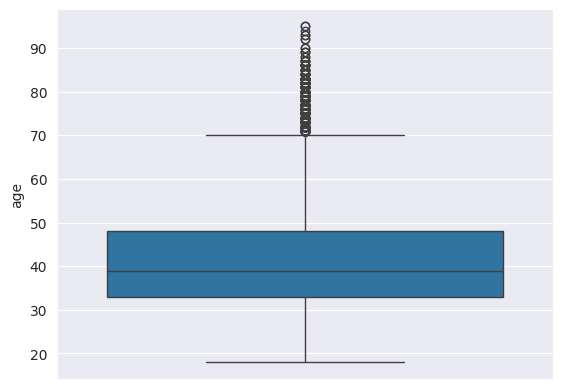

In [50]:
#plot the boxplot of age variable.
sns.boxplot(inp1.age)
plt.show()

On the boxplot we can notice that there ages above 70 yearsn in our case those ages cannot be considered as outliers since they are valid because it may exist customers with such ages. In addition the dataset description doesn't provide any age range.

#### Salary variable

In [51]:
#describe the salary variable of inp1.
inp1.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

Here we notice that the minimum salary is 0 meaning that at least one customer has no salary.

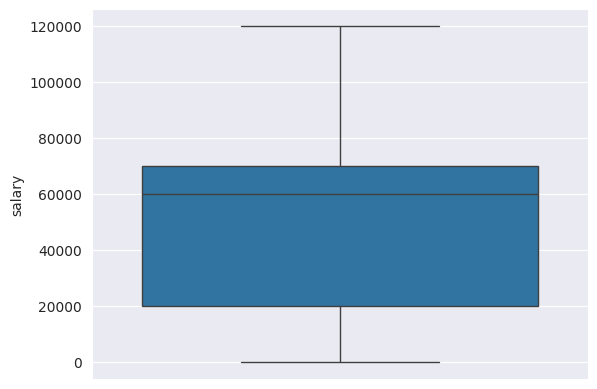

In [52]:
#plot the boxplot of salary variable.
sns.boxplot(inp1.salary)
plt.show()

#### Balance variable

In [53]:
#describe the balance variable of inp1.
inp1.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

Here the bank customers have a median balance of 448, and at least one of the customer has a balance in deficit of -8019 even though the max balance is 102127.

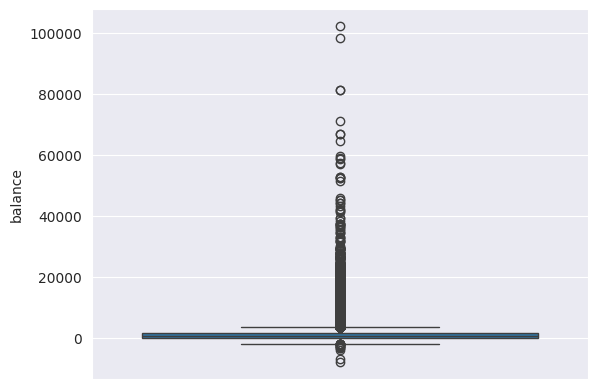

In [54]:
#plot the boxplot of balance variable.
sns.boxplot(inp1.balance)
plt.show()

In [55]:
#plot the boxplot of balance variable after scaling in 8:2.
# I do not understand this part


In [56]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable


### Segment- 6, Standardising values

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [57]:
#describe the duration variable of inp1
inp1.duration.describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [58]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
for unit in list(inp1.duration.values):
    if unit.split(' ')[1] == 'sec':
        dur_min = int(unit.split(' ')[0])/60
        inp1.duration.replace(unit, dur_min, inplace=True)
    else:
        inp1.duration.replace(unit, unit.split(' ')[0], inplace=True)

In [59]:
inp1.duration.unique()

array([4.35, 2.5166666666666666, 1.2666666666666666, ...,
       '20.7666666666667', '25.9333333333333', '16.2833333333333'],
      dtype=object)

In [60]:
#describe the duration variable
inp1.duration= pd.to_numeric(inp1.duration)
inp1.duration.describe()

count    45161.000000
mean         4.302774
std          4.293129
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

## Session- 3, Univariate Analysis

### Segment- 2, Categorical unordered univariate analysis

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status

In [48]:
#calculate the percentage of each marital status category.
percentage_marital = inp1.marital.value_counts(normalize=True).mul(100).round(1)
df = percentage_marital.to_frame()
df.rename(columns={'marital':'Percentage'}, inplace=True)
df

,proportion
marital,
married,60.2
single,28.3
divorced,11.5


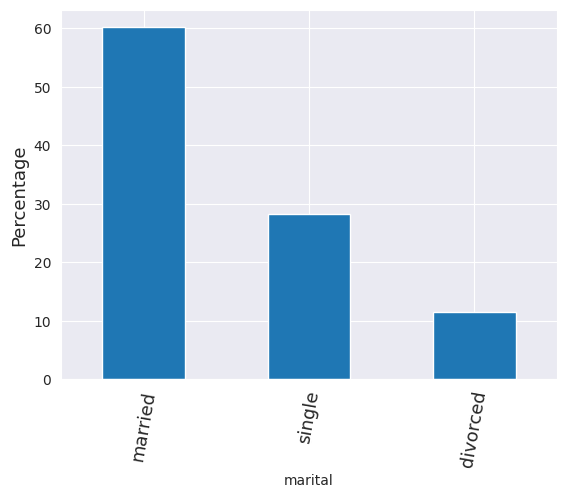

In [49]:
#plot the bar graph of percentage marital status categories
df.proportion.plot(kind='bar', rot=80)
plt.ylabel('Percentage',fontsize = 13)
plt.xticks(fontsize = 13)
plt.show()

60.2% of the bank customers are married.

#### Job  

In [50]:
#calculate the percentage of each job status category.
percentage_job = inp1.job.value_counts(normalize=True).mul(100).round(1)
df = percentage_job.to_frame()
df.rename(columns={'job':'Percentage'}, inplace=True)
df

,proportion
job,
blue-collar,21.5
management,20.9
technician,16.8
admin.,11.4
services,9.2
retired,5.0
self-employed,3.5
entrepreneur,3.3
unemployed,2.9


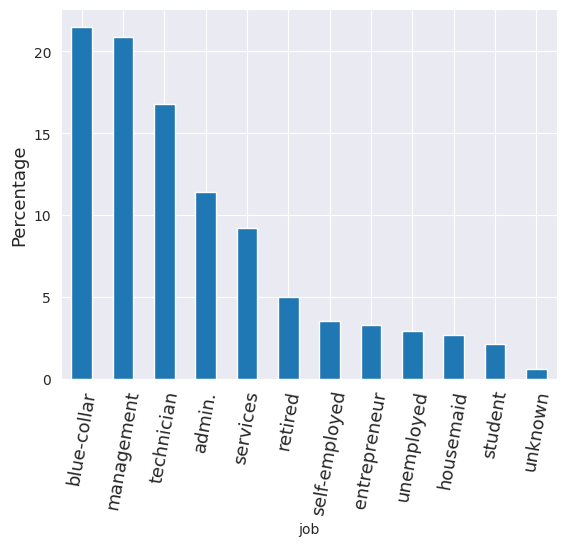

In [51]:
#plot the bar graph of percentage job categories
df.proportion.plot(kind='bar', rot=80)
plt.ylabel('Percentage', fontsize = 13)
plt.xticks(fontsize = 13)
plt.show()

Most of the bank customers are blue-collars, managers and technicians.

### Segment- 3, Categorical ordered univariate analysis

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

In [52]:
#calculate the percentage of each education category.
percent_edu = inp1.education.value_counts(normalize=True).mul(100).to_frame().round(1)
percent_edu

,proportion
education,
secondary,51.3
tertiary,29.4
primary,15.1
unknown,4.1


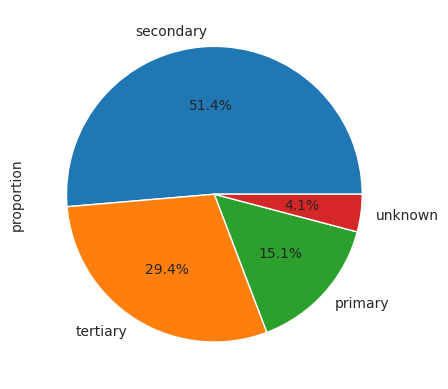

In [53]:
#plot the pie chart of education categories
fig = percent_edu.plot(kind='pie',autopct='%1.1f%%',subplots=True, legend=False)
plt.show()

Most of the bank's customers are educated, with over 35% having attained at least a secondary education level.

#### poutcome

In [54]:
#calculate the percentage of each poutcome category.
percent_poutcome = inp1.poutcome.value_counts(normalize=True).mul(100).to_frame().round(1)
percent_poutcome

,proportion
poutcome,
unknown,81.8
failure,10.8
other,4.1
success,3.3


We can notice that the previous bank telemarketing campaign was not a success because 81.8% of the clients was not previously contacted or the outcome was not recorded and 10.8% of the customers did not respond or responded negatively.  

#### Response the target variable

In [55]:
#calculate the percentage of each response category.
percent_response = inp1.response.value_counts(normalize=True).mul(100).to_frame().round(1)
percent_response

,proportion
response,
no,88.3
yes,11.7


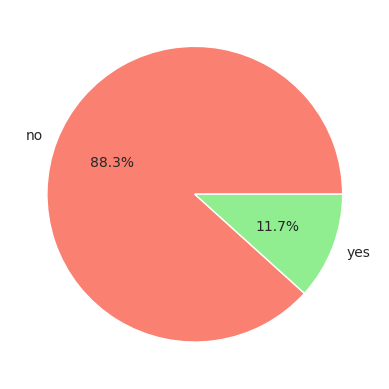

In [56]:
#plot the pie chart of response categories
fig = plt.pie(x= percent_response.proportion, labels=percent_response.index,autopct='%1.1f%%', colors=['salmon', 'lightgreen'])

The outcome of the telemarketing call is that 88.3% of the customers decline to term deposit offer.

## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

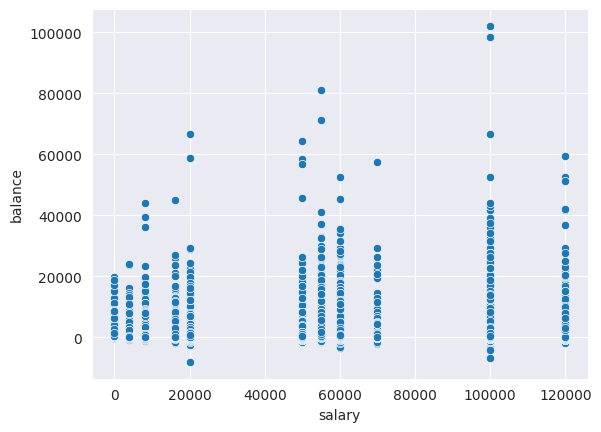

In [57]:
#plot the scatter plot of balance and salary variable in inp1
sns.scatterplot(x= inp1.salary, y=inp1.balance, data = inp1)
plt.show()

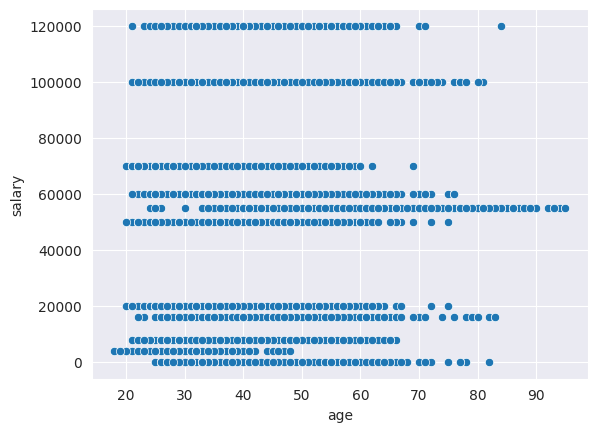

In [58]:
#plot the scatter plot of balance and age variable in inp1
sns.scatterplot(x= inp1.age, y=inp1.salary, data = inp1)
plt.show()

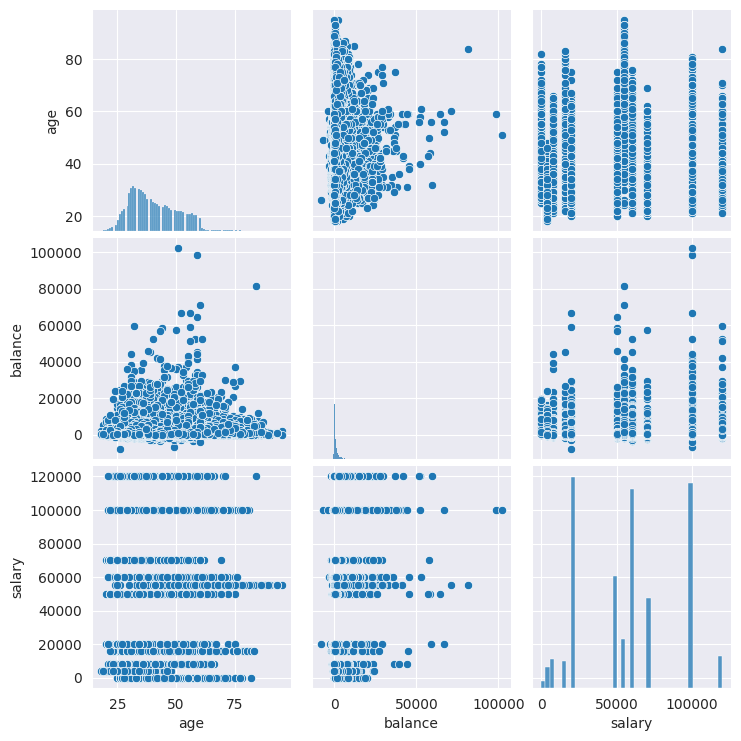

In [59]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(inp1[['age','balance','salary']])
plt.show()

#### Correlation heat map

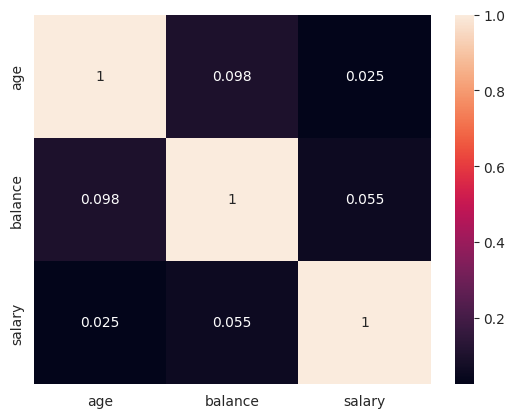

In [60]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
sns.heatmap(inp1[['age','balance','salary']].corr(), annot=True)
plt.show()

There is no correlation between the age, the salary and the balance of the customers. This means that any relationship can't be established here.

### Segment- 4, Numerical categorical variable

#### Salary vs response

In [60]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
salary_vs_resp_mean = inp1[['response','salary']].groupby('response').mean().round(2)
salary_vs_resp_mean

,salary
response,
no,56769.51
yes,58780.51


The average salary of the customers who denied the term deposit offer is less than those who accepted.

In [61]:
#groupby the response to find the median of the salary with response no & yes seperatly.
salary_vs_resp_med = inp1[['response','salary']].groupby('response').median().round(2)
salary_vs_resp_med

,salary
response,
no,60000.0
yes,60000.0


The median salary of the customers who denied the term deposit offer is egal to those who accepted. Therefore the rejection or the acceptation of the offer doesn't depend on the salary.

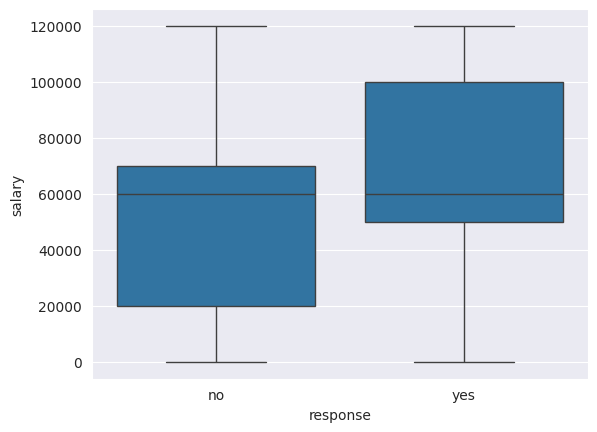

In [62]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(x = inp1.response, y = inp1.salary)
plt.show()

Based on the boxplot we can notice that those who accepted the offer have quite good salary compare to the ones who denied the offer.

#### Balance vs response

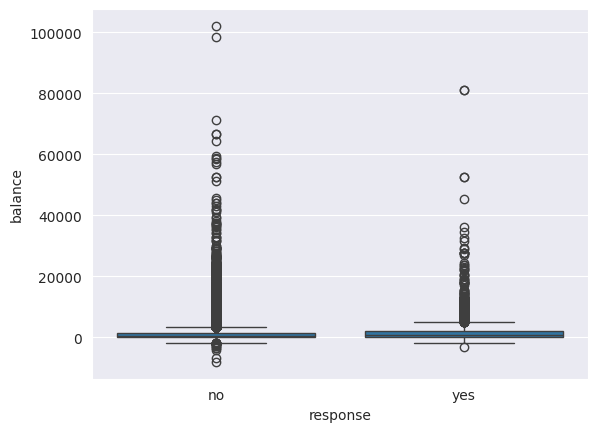

In [63]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(x = inp1.response, y = inp1.balance)
plt.show()

We can make the same remark for the balance as well.

In [64]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp1[['response','balance']].groupby('response').mean().round(2)

,balance
response,
no,1304.29
yes,1804.68


In [65]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp1[['response','balance']].groupby('response').median().round(2)

,balance
response,
no,417.0
yes,733.0


The median balance of customers who accepted the offer is 733 compared to those who denied which is 417.

##### 75th percentile

In [66]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [67]:
#calculate the mean, median and 75th percentile of balance with response


In [68]:
#plot the bar graph of balance's mean an median with response.


#### Education vs salary

In [69]:
#groupby the education to find the mean of the salary education category.
inp1[['education','salary']].groupby('education').mean().round(2)

,salary
education,
primary,34232.34
secondary,49731.45
tertiary,82880.25
unknown,46529.63


In [70]:
#groupby the education to find the median of the salary for each education category.
inp1[['education','salary']].groupby('education').median().round(2)

,salary
education,
primary,20000.0
secondary,55000.0
tertiary,100000.0
unknown,50000.0


The higher the level of education, the higher the salary for customers.

#### Job vs salary

In [71]:
#groupby the job to find the mean of the salary for each job category.
inp1[['job','salary']].groupby('job').mean().round(2)

,salary
job,
admin.,50000.0
blue-collar,20000.0
entrepreneur,120000.0
housemaid,16000.0
management,100000.0
retired,55000.0
self-employed,60000.0
services,70000.0
student,4000.0


The data shows that entrepreneurs and managers have the highest salary.

### Segment- 5, Categorical categorical variable

In [75]:
from sklearn.preprocessing import LabelEncoder

In [72]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
#inp1.response.replace(['yes', 'no'],[1,0], inplace=True)

In [73]:
inp1.response.unique()

array(['no', 'yes'], dtype=object)

#### Education vs response rate

In [76]:
#calculate the mean of response_flag with different education categories.
#inp1[['education','response']].groupby('education').mean().round(2)

The customers who have tertiary education level have mostly accepted the offer.

#### Marital vs response rate

In [ ]:
#calculate the mean of response_flag with different marital status categories.
inp1[['marital','response']].groupby('marital').mean().round(2)

,response
marital,
divorced,0.12
married,0.10
single,0.15


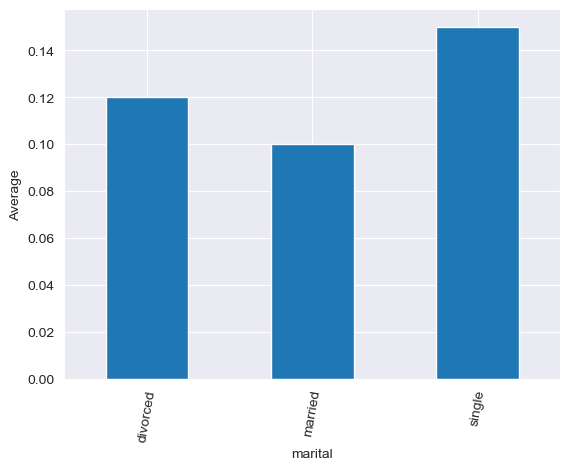

In [ ]:
#plot the bar graph of marital status with average value of response_flag
inp1[['marital','response']].groupby('marital').mean().round(2).plot(kind='bar', legend=False, rot=80)
plt.ylabel('Average')
plt.show()

The response rate of single is the highest. Meaning that most of the customers who responded to the telemarketing are singles.

#### Loans vs response rate

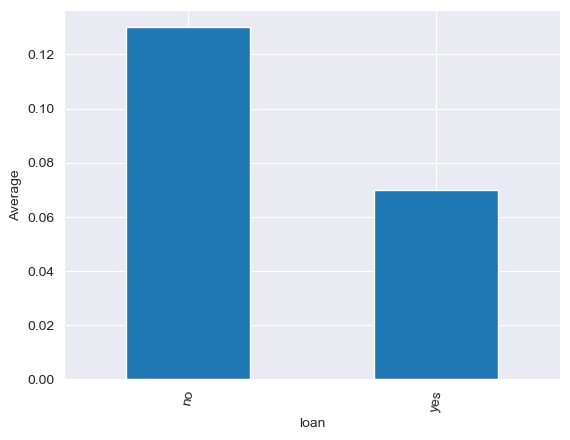

In [ ]:
#plot the bar graph of personal loan status with average value of response_flag
inp1[['loan','response']].groupby('loan').mean().round(2).plot(kind='bar', legend=False, rot=80)
plt.ylabel('Average')
plt.show()

The response rate of those who have loans is the highest.

#### Housing loans vs response rate

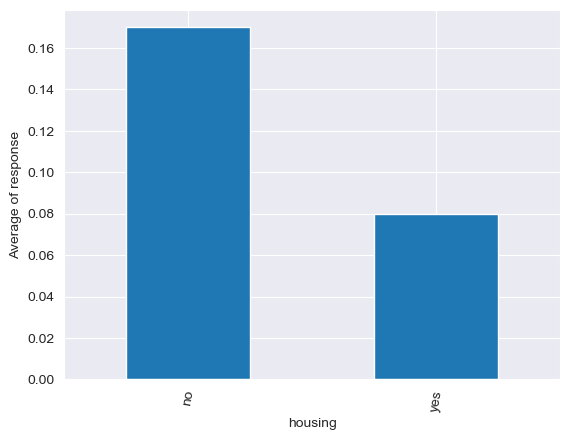

In [ ]:
#plot the bar graph of housing loan status with average value of response_flag
inp1[['housing','response']].groupby('housing').mean().round(2).plot(kind='bar', legend=False, rot=80)
plt.ylabel('Average of response')
plt.show()

The response rate of those who have housing is the highest.

#### Age vs response

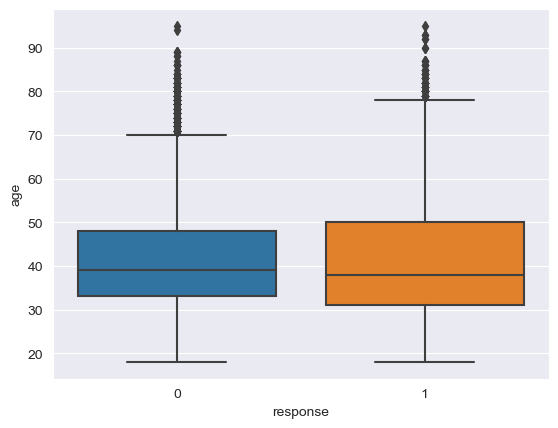

In [ ]:
#plot the boxplot of age with response_flag
sns.boxplot(x = inp1.response, y = inp1.age)
plt.show()

The customers age doesn't affect the reponse to the offer.

##### making buckets from age columns

In [ ]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
#inp1.age = pd.cut(inp1.age, bins=[0,30,40,50,60,max(inp1.age)], labels = ["<30", "30-40", "40-50","50-60",'>60'],include_lowest=True)

In [ ]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
inp1.age.unique()

<IntegerArray>
[58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32, 25, 40,
 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30, 27, 34, 23, 26,
 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64, 69, 72, 71, 19, 76, 85,
 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86, 95, 81, 18, 89, 84, 87, 92, 93,
 88]
Length: 77, dtype: Int64

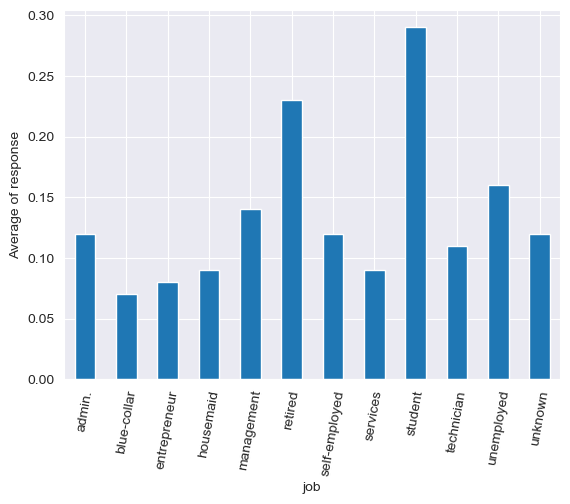

In [ ]:
#plot the bar graph of job categories with response_flag mean value.
inp1[['job','response']].groupby('job').mean().round(2).plot(kind='bar', legend=False, rot=80)
plt.ylabel('Average of response')
plt.show()

Students were more likely to give a response to the offer following by the retired.

### Segment-6, Multivariate analysis

#### Education vs marital vs response

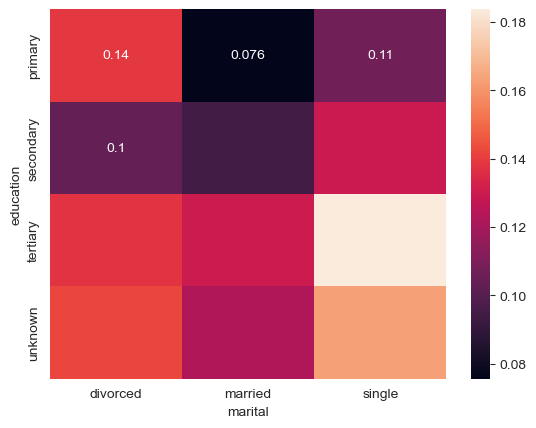

In [ ]:
#create heat map of education vs marital vs response_flag
inp1_heatmap = inp1.pivot_table(values='response',index='education',columns='marital',aggfunc=np.mean)
sns.heatmap(inp1_heatmap,annot=True)
plt.show()

Based on the heatmap, we can notice that the singles with a tertiary education level responded more to the telemarketing than the other categories of customers. Following by singles with unknown level of education.

#### Job vs marital vs response

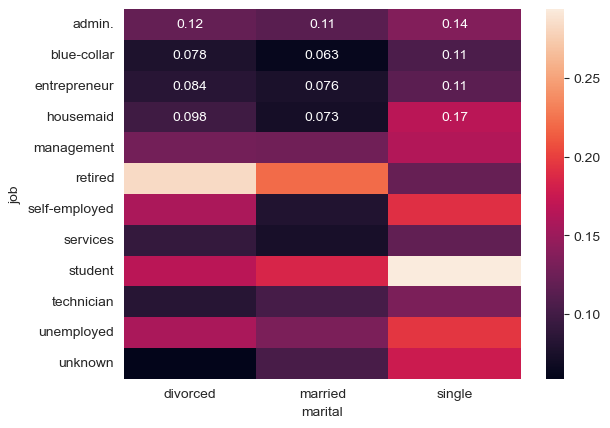

In [ ]:
#create the heat map of Job vs marital vs response_flag.
inp1_heatmap = inp1.pivot_table(values='response',index='job',columns='marital',aggfunc=np.mean)
sns.heatmap(inp1_heatmap,annot=True)
plt.show()

Here, we can see that married and divorced retired were mostly reacted to telemarketing as well as single students than the other customer categories.

#### Education vs poutcome vs response

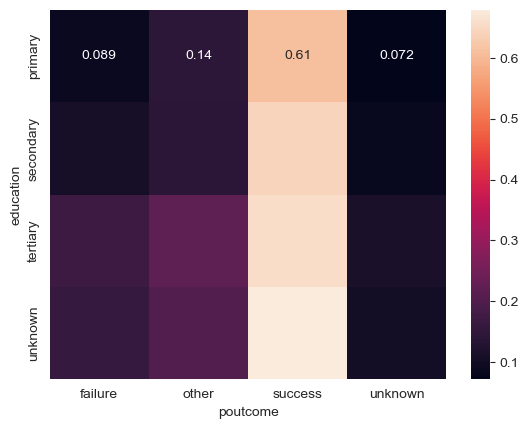

In [ ]:
#create the heat map of education vs poutcome vs response_flag.
inp1_heatmap = inp1.pivot_table(values='response',index='education',columns='poutcome',aggfunc=np.mean)
sns.heatmap(inp1_heatmap,annot=True)
plt.show()

The response rate of the bank telemarketing is higher for customers with different levels of education who previously accepted the first telemarketing campaign offer.

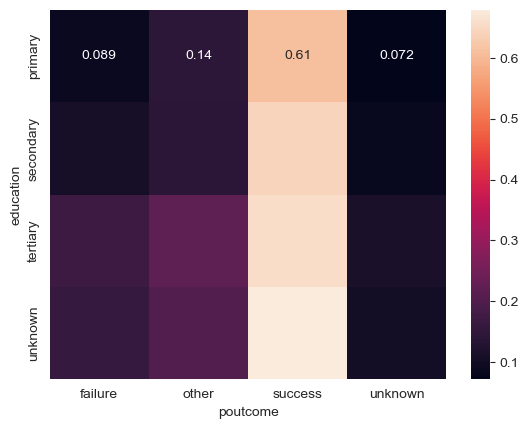

In [ ]:
inp1_heatmap = inp1.pivot_table(values='response',index='education',columns='poutcome',aggfunc=np.mean)
sns.heatmap(inp1_heatmap,annot=True)
plt.show()

**Key insights:**

The bank telemarketing campaign was a failure because 88.4% of the customers declined to the offer. Only customers who have a good salary and a fair balance have accepted. Those customers have tertiary level of education, mostly singles, working as entrepreneurs and managers, and are not under loans.
So to improve the positive response rate this EDA shows at a first glance that the bank should contact this category of clients.
It is important to note that a further analysis can show more insights.

## Telemarketing Campaign Modelling

Now that we identify some insights, let's build a Machine Learning model that can predict the customers who are likely to accept or deny the offer. The bank can use the prediction to quickly or efficiently target the rights customers and succeed the telemarketing campaign.

In our case the target variable is "response" and it is categorical with two possible items {"yes", "no"}. Therefore we are going tackle a classification problem. To build the model we need to:

Choose the model. We can also try multiple classification model and see which one perform better.

Prepare the data first. Theses steps involve:
- Removing or imputing the NaN
- Scaling the features
- Transforming the categorical data to dummy variables etc.

Split the data into train, test and validation.

Train the model

Test the model

Validate the model using cross validation

Deploy the model.


In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

In [62]:
inp1.shape

(45161, 19)

In [63]:
inp1.select_dtypes([int,float]).corr()

,age,salary,balance,day,duration,campaign,pdays,previous
age,1.000000,0.024513,0.097710,-0.008972,-0.004392,0.004814,-0.107919,0.001352
salary,0.024513,1.000000,0.055489,0.027774,-0.009988,0.015010,-0.106901,0.014560
balance,0.097710,0.055489,1.000000,0.004446,0.021566,-0.014430,-0.108056,0.016720
day,-0.008972,0.027774,0.004446,1.000000,-0.030371,0.162500,-0.089671,-0.051693
duration,-0.004392,-0.009988,0.021566,-0.030371,1.000000,-0.084379,-0.024375,0.001116
campaign,0.004814,0.015010,-0.014430,0.162500,-0.084379,1.000000,0.049933,-0.032791
pdays,-0.107919,-0.106901,-0.108056,-0.089671,-0.024375,0.049933,1.000000,-0.023160
previous,0.001352,0.014560,0.016720,-0.051693,0.001116,-0.032791,-0.023160,1.000000


In [64]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [65]:
#let's break the dataset into independent variables and dependent variable
X  = inp1.drop(['response','pdays','contact',], axis=1)
encoder = LabelEncoder()
Y = encoder.fit_transform(inp1['response'])

In [66]:
inp0.response.replace(['yes', 'no'],[1,0], inplace=True)

In [67]:
#model = smf.ols('response ~ marital * targeted * default * housing * loan * poutcome * job * education', data=inp0).fit()

In [68]:
#anova_table = sm.stats.anova_lm(model, typ=2)
#print(anova_table)

In [69]:
X.head()

,age,salary,balance,marital,targeted,default,housing,loan,day,month,duration,campaign,previous,poutcome,job,education
0,58,100000,2143,married,yes,no,yes,no,5,may,4.350000,1,0,unknown,management,tertiary
1,44,60000,29,single,yes,no,yes,no,5,may,2.516667,1,0,unknown,technician,secondary
2,33,120000,2,married,yes,no,yes,yes,5,may,1.266667,1,0,unknown,entrepreneur,secondary
3,47,20000,1506,married,no,no,yes,no,5,may,1.533333,1,0,unknown,blue-collar,unknown
4,33,0,1,single,no,no,no,no,5,may,3.300000,1,0,unknown,unknown,unknown


In [71]:
X = X.drop(['targeted','default','day','duration','duration', 'campaign', 'previous','month'], axis=1)

Since the independent variables is a mix of categorical and numerical variables we need to transform the categorical data to dummy.
For the numerical variables we need to scale because they are in different scales.

In [72]:
X_train, X_test , y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

Now that we have prepared and split our data, we can build the model. Let's try the Random Forest.

## Model Pipeline

let's build a model pipeline that include data preprocessing to model building.

In [76]:
# Columns to be scaled
scaled_features = X.select_dtypes([int, float]).columns
# Columns to transform to dummies
dummy_variables = X.select_dtypes(object).columns
# Create transformers
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())
                                     ])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder()
)])

# Combine all transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, scaled_features),
                                               ('cat', categorical_transformer, dummy_variables)
                                            ])
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier())

])
print(pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'salary', 'balance'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['marital', 'housing', 'loan', 'poutcome', 'job', 'education'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])


In [74]:
grid_params = [{'classifier__n_estimators':np.arange(1,20), 'classifier__max_depth': np.arange(1,10)}]
grid = GridSearchCV(pipeline, grid_params ,cv=5)
grid.fit(X_train, y_train)
model = grid.best_estimator_

In [75]:
y_predict = model.predict(X_test)
y_predict

array([0, 1, 0, ..., 0, 0, 0])

## Model Evaluation

In [78]:
print(f'The model accuracy is {round(accuracy_score(y_predict, y_test),2)}')

The model accuracy is 0.89


In [79]:
print(f'Model classification report {classification_report(y_predict, y_test)}')

Model classification report               precision    recall  f1-score   support

           0       0.99      0.90      0.94     13185
           1       0.16      0.68      0.25       364

    accuracy                           0.89     13549
   macro avg       0.57      0.79      0.60     13549
weighted avg       0.97      0.89      0.92     13549



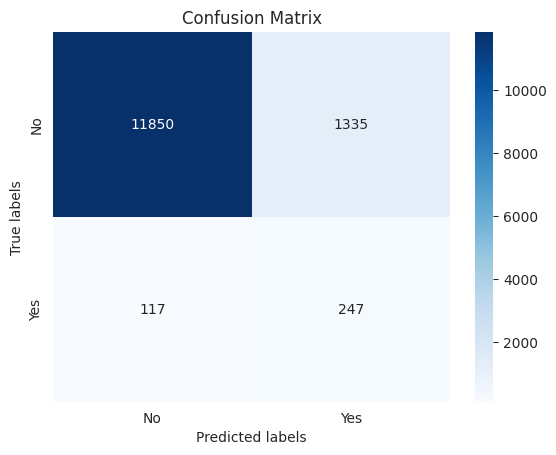

In [80]:
sns.heatmap(confusion_matrix(y_predict, y_test), annot=True, fmt='g',  cmap='Blues',
           xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Let's see the features that contribute most to the model.

### Model deployement

In [84]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00


In [87]:
pip install fastapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [88]:
import pickle
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel, ValidationError

In [89]:
import streamlit as st

In [90]:
import joblib

In [83]:
joblib.dump(model,'bank_telemarketing_model.pkl')

['bank_telemarketing_model.pkl']

In [92]:
model = joblib.load('bank_telemarketing_model.pkl')

In [93]:
st.title('Random Forest Classifier')
st.write('This app predicts whether a customer will accept or deny the bank term deposit offer.')

# User inputs
age = st.number_input('Age', min_value=0, max_value=100, value=30)
salary = st.number_input('Salary', min_value=0, value=50000)
balance = st.number_input('Balance', min_value=-200, value=100000)
marital = st.selectbox('Marital Status', options=['married','single','divorced'])
housing = st.selectbox('Housing', options=['yes', 'no'])
loan = st.selectbox('Loan', options=['yes', 'no'])
poutcome= st.selectbox('Previous Outcome', options=['unknown', 'other', 'failure', 'success'])
job= st.selectbox('Job', options=['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'])
education= st.selectbox('Education', options=['primary', 'secondary', 'tertiary', 'unknown'])

# Prediction
input_data = pd.DataFrame([[age, salary, balance, marital, housing, loan,
                           poutcome, job, education]], columns=['age', 'salary', 'balance',
                          'marital',  "housing", "loan", "poutcome", "job", "education"])
prediction = model.predict(input_data)

# Display prediction
if st.button('Predict'):
    st.write(f'The prediction is: {int(prediction[0])}')

2024-06-10 20:58:22.346 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-06-10 20:58:22.356 Session state does not function when running a script without `streamlit run`


Here we created a streamlit app for prediction. The app is an interface for the bank to make prediction about which customer is likely to accept or deny the Term deposit offer.